In [1]:
import statsmodels.api as sm
import pandas as pd

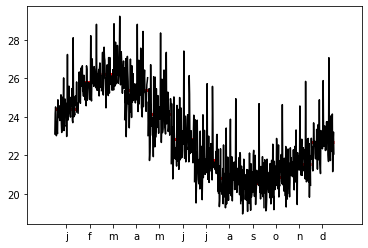

In [2]:
dta = sm.datasets.elnino.load_pandas().data
dta['YEAR'] = dta.YEAR.astype(int).astype(str)
dta = dta.set_index('YEAR').T.unstack()
dates = pd.to_datetime(list(map(lambda x: '-'.join(x) + '-1',dta.index.values)))
dta.index = pd.DatetimeIndex(dates, freq='MS')
fig = sm.graphics.tsa.month_plot(dta)

In [3]:
dta

1950-01-01    23.11
1950-02-01    24.20
1950-03-01    25.37
1950-04-01    23.86
1950-05-01    23.03
              ...  
2010-08-01    19.49
2010-09-01    19.28
2010-10-01    19.73
2010-11-01    20.44
2010-12-01    22.07
Freq: MS, Length: 732, dtype: float64

In [5]:
per = pd.Period('2018Q1', freq='Q')





In [6]:
per.qyear

2018

In [7]:
per.year

2018

DatetimeIndex(['2012-03-31', '2012-06-30', '2012-09-30', '2012-12-31',
               '2013-03-31', '2013-06-30', '2013-09-30', '2013-12-31',
               '2014-03-31', '2014-06-30', '2014-09-30', '2014-12-31',
               '2015-03-31', '2015-06-30', '2015-09-30', '2015-12-31',
               '2016-03-31', '2016-06-30', '2016-09-30', '2016-12-31',
               '2017-03-31', '2017-06-30', '2017-09-30', '2017-12-31',
               '2018-03-31', '2018-06-30', '2018-09-30', '2018-12-31',
               '2019-03-31', '2019-06-30', '2019-09-30', '2019-12-31'],
              dtype='datetime64[ns]', freq='Q-DEC')

In [11]:
df = pd.DataFrame({"y": [1,2,3], 'col': pd.to_datetime(["2000-03-31 00:00:00", "2000-05-31 00:00:00", "2000-08-31 00:00:00"])})


df['col'] = df['col'].dt.to_period("Q")

In [12]:
df

,y,col
0,1,2000Q1
1,2,2000Q2
2,3,2000Q3


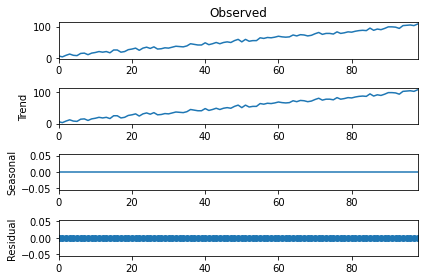

In [17]:
from random import randrange
from pandas import Series
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
series = [i+randrange(10) for i in range(1,100)]
result = seasonal_decompose(series, model='additive', period=1)
result.plot()
plt.show()

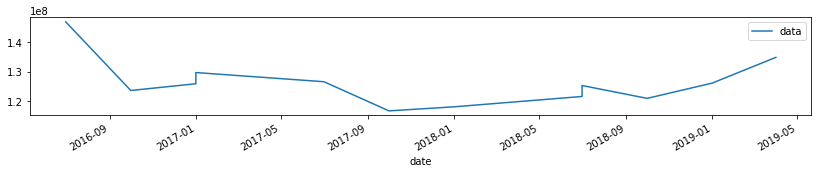

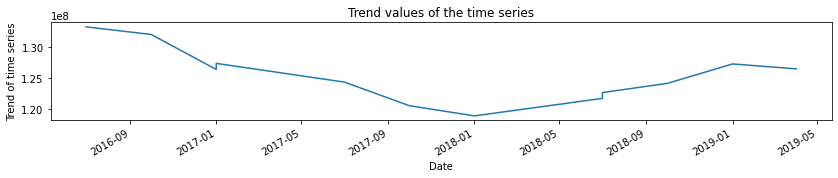

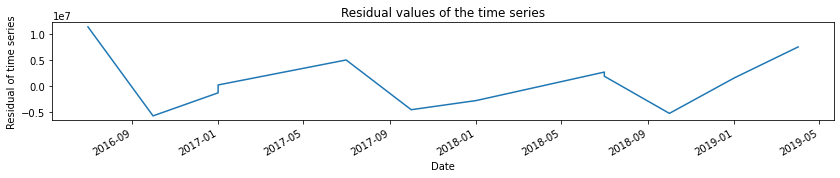

In [19]:
date=['2016Q3'
 ,'2016Q4'
 ,'2017Q1'
 ,'2017Q1'
 ,'2017Q3'
 ,'2017Q4'
 ,'2018Q1'
 ,'2018Q3'
 ,'2018Q3'
 ,'2018Q4'
 ,'2019Q1'
 ,'2019Q2']

data=[146660510.0
 ,123641451.0
 ,125905843.0
 ,129656327.0
 ,126586708.0
 ,116804168.0
 ,118167263.0
 ,121633740.0
 ,125314447.0
 ,120994896.0
 ,126124709.0
 ,134753318.0]

df=pd.DataFrame({'date':date,'data':data})
df['date']=pd.to_datetime(df['date'])
df=df.set_index('date')
ax=df.plot(figsize=(14,2))
plt.show()

decomposition=sm.tsa.seasonal_decompose(x=df['data'],model='additive',      extrapolate_trend='freq', period=3)

decomposition_trend=decomposition.trend
ax= decomposition_trend.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Trend of time series')
ax.set_title('Trend values of the time series')
plt.show()

decomposition_residual=decomposition.resid
ax= decomposition_residual.plot(figsize=(14,2))
ax.set_xlabel('Date')
ax.set_ylabel('Residual of time series')
ax.set_title('Residual values of the time series')
plt.show()